## Importing Libraries 

In [1]:
#importing libraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import math
%matplotlib inline
import random

## Loading data from the given pickle file


In [2]:
data_file="MNIST_data.pkl"   # load the data set
                              
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']                         #image_data: 60000 x 784 matrix
y = train_dataset['y']                         #labels:60000 x 1 matrix

# normalize : subtracting the minimum value of each column from every
# element in that column, and then dividing each element in the column 
# by the maximum value of that column. 

normalized_X = np.zeros(X.shape)
normalized_X +=  X - np.min(X, axis = 0, keepdims = True)
max_X = np.max(normalized_X, axis = 0, keepdims = True)
for i in range(X.shape[1]): #to access the number of columns
    if(max_X[0][i]==0):
        max_X[0][i] = 1
normalized_X/= max_X

# Split into X_train, y_train, X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



## Displaying a 4x4 grid

C:\Users\aanki\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


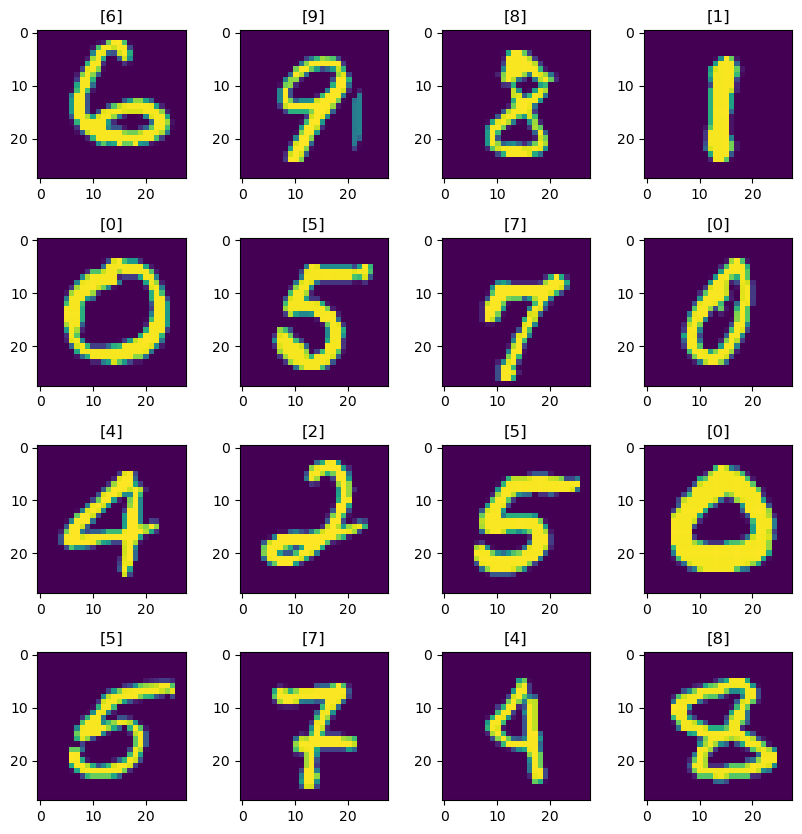

In [3]:

# choose 16 images randomly, display the images as well as corresponding label
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(X[i].reshape(28, 28))
    axes[i].set_title(y[i])
plt.subplots_adjust(hspace=0.4)
plt.show()

## Building up activation function

In [4]:
#Building up parts of our classifier; Activation functions
# ReLU activation function

def relu(z):
    return np.maximum(0, z)    
#initialising softmax activation function
def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum(axis=1, keepdims=True)


## Initializing parameters

In [5]:
def initial_parameters(X, in_dim, hid_dim, out_dim):             #initialising parameters
    W0 = 0.01 * np.random.randn(in_dim, hid_dim) / np.sqrt(in_dim / 2) 
    b0 = np.zeros((hid_dim,1))
    b1 = np.zeros((out_dim, 1))
    W1 = 0.01 * np.random.randn(hid_dim, out_dim) / np.sqrt(hid_dim / 2)
    return (W0, b0, W1, b1)


## Forward Propagation

In [6]:
#Forward Propagation 

def forward_pass(X, weights):
    W0,b0,W1,b1 = weights
    hid_layer = relu(np.dot(X, W0) + b0.T)
    out_layer = (np.dot(hid_layer, W1) + b1.T) 
    return (hid_layer, out_layer)
    

## Backward Propagation

In [7]:
#Backward Propagation

def backward_pass(X, y, weights, layers, lr):
    W0,b0,W1,b1 = weights
    loss = 0
    hid_layer, out_layer= layers
    gradient = softmax(out_layer)
    
    x= np.arange(out_layer.shape[0])
    gradient[x,y.T] -= 1
    
    gradient /= out_layer.shape[0]
    
    gradient_b1 = np.sum(gradient,axis=0,keepdims=True).T
    gradient_W1 = np.dot(hid_layer.T , gradient)
    gradient = np.dot(gradient, W1.T) 
    # now grad has grad w.r.t hidden layer
    gradient = gradient * (hid_layer > 0)
    gradient_b0 = np.sum(gradient,axis=0,keepdims=True).T
    gradient_W0 = np.dot(X.T , gradient)
    # value updation(normal linear update)
    W1 -= gradient_W1 * lr
    W0 -= gradient_W0 * lr
    b0 -= gradient_b0 * lr
    b1 -= gradient_b1 * lr
    return (W0,b0,W1,b1)
    
    
    

## Cost Function

In [8]:
# Cost function
def cost_func(y,out_layer):

    loss=0
    probability = softmax(out_layer)
    probability = -1* np.log(probability)

    loss = probability[np.arange(out_layer.shape[0]),y.T].sum()
    loss/=out_layer.shape[0]
    return loss


## Integrating everything and train

In [9]:
def train(X, y, hidden_nodes, epochs=1000, lr=1e-3):
    
    # initialize weights 
    weights = initial_parameters(X.shape[0],X.shape[1],hidden_nodes,10)

    for i in range(epochs):
        s_X, _, s_y, _ = train_test_split(X,y,stratify=y,test_size=256/48000)
        layers = forward_pass(s_X, weights)
        loss = cost_func(s_y,layers[1])
        if i % 100 == 0:
            print("Iteration number: ", i, "; Epoch loss: ", loss)         # cost at every 100 iterations
        weights = backward_pass(s_X, s_y, weights, layers, lr)
    return weights

In [10]:
#prediction
def predict(X, new_weights):
    W0,b0,W1,b1 = new_weights
    hid_dim = relu(np.dot(X, W0) + b0.T)
    scores = (np.dot(hid_dim, W1) + b1.T) 
    predictions = np.argmax(scores, axis=1)
    return predictions.reshape(-1,1)
    sol = numpy.zeros((X.shape[0],1))
    return np.argmax(predictions, axis=1)

In [11]:
#accuracy 
def accuracy(predictions, y_true):
    
    print(y_true.shape)
    print(predictions.shape)
    acc = np.sum(predictions == y_true)/len(predictions)    
    print('Accuracy=', acc)
    return 
    acc = accuracy(predictions, y_test)
    print("Accuracy: ", acc)



In [12]:
weights = train(X_train,y_train,256,lr = 1e-3)
predictions = predict(X_test, weights)
accuracy(predictions,y_test)

Iteration number:  0 ; Epoch loss:  2.3032084050242605
Iteration number:  100 ; Epoch loss:  0.41420674109436817
Iteration number:  200 ; Epoch loss:  0.32733314354684845
Iteration number:  300 ; Epoch loss:  0.28954788244111923
Iteration number:  400 ; Epoch loss:  0.26110411008796164
Iteration number:  500 ; Epoch loss:  0.23701246835929474
Iteration number:  600 ; Epoch loss:  0.21627261082269084
Iteration number:  700 ; Epoch loss:  0.19911020399838814
Iteration number:  800 ; Epoch loss:  0.18412282377902472
Iteration number:  900 ; Epoch loss:  0.1707767612634158
(12000, 1)
(12000, 1)
Accuracy= 0.9503333333333334


In [13]:
import pickle
import random

roll_num = "22M0222" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': weights[0], # layer 0 weight (784, z)
    'layer_0_bias':weights[1], # layer 0 bias (z, 1)
    'layer_1_wt': weights[2], # layer 1 weight (z, 10)
    'layer_1_bias': weights[3], # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)